### 합성곱  
**합성곱**(convolution)은 마치 입력 데이터에 마법의 도장을 찍어서 유용한 특성만 드러나게 하는 것으로 비유할 수 있다. 합성곱의 동작 원리를 자세히 알아보자.
<br><br/>
7장에서 사용한 밀집층에는 뉴런마다 입력 개수만큼의 가중치가 있다.  
즉 모든 입력에 가중치를 곱한다. 이 과정을 그림으로 표현하면 다음과 같다.  
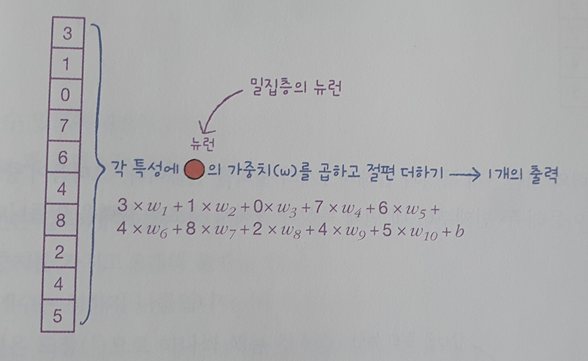  
인공 신경망은 처음에 가중치 w<sub>1</sub> ~ w<sub>10</sub>과 절편 b를 랜덤하게 초기화한 다음 에포크를 반복하면서 경사 하강법 알고리즘을 사용하여 손실이 낮아지도록 최적의 가중치와 절편을 찾아간다. 이것이 바로 모델 훈련이다.
<br><br/>
예를 들어 밀집층에 뉴런이 3개 있다면 출력이 3개가 된다.입력 개수에 상관없이 동일하다. 7장의 예를 들어보면 패션 MNIST 이미지에 있는 784개의 픽셀을 입력받는 은닉층의 뉴런 개수가 100개면 뉴런마다 하나씩 출력도 100개가 된다.
<br><br/>
합성곱은 밀집층의 계산과 조금 다르다. 입력 데이터 전체에 가중치를 적용하는 것이 아니라 일부에 가중치를 곱한다. 다음 그림과 이전의 밀집층 그림을 비교해 보자. 여기에서는 이 뉴런이 3개의 가중치를 가진다고 가정하였다.  
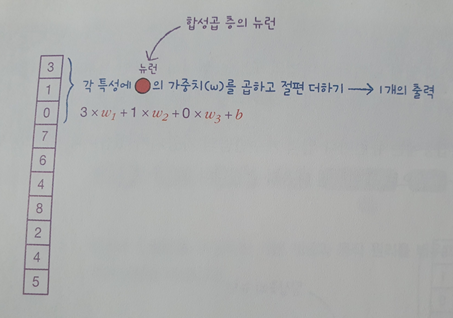  
가중치 w<sub>1</sub> ~ w<sub>3</sub>이 입력의 처음 3개 특성과 곱해져 1개의 출력을 만든다. 그리고 이 뉴런이 한 칸 아래로 이동해 두 번째부터 네 번째 특성과 곱해져 새로운 출력을 만든다. 다음 그림을 참고하자  
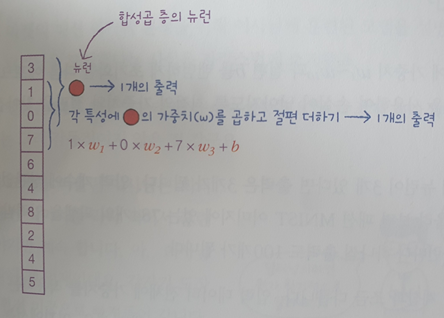  
여기에서 중요한 것은 첫 번째 합성곱에 사용된 가중치 w<sub>1</sub> ~ w<sub>3</sub>과 절편 b가 두 번째 합성곱에도 동일하게 사용된다. 이렇게 한 칸씩 아래로 이동하면서 출력을 만드는 것이 합성곱이다. 여기에서는 이 뉴런의 가중치가 3개이기 때문에 모두 8개의 출력이 만들어진다.  
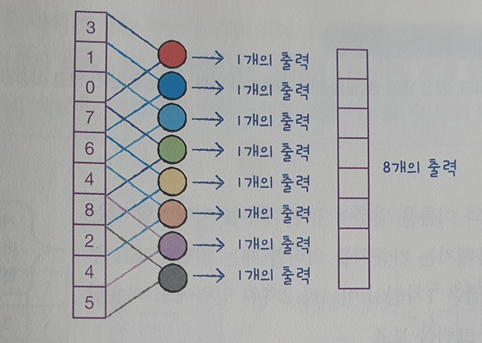  
쉽게 구분할 수 있도록 8번의 계산을 다른 색으로 나타냈지만 모두 같은 뉴런이다. 즉 모두 같은 가중치 w<sub>1</sub> ~ w<sub>3</sub>과 절편 b를 사용한다.  
<br><br/>
밀집층의 뉴런은 입력 개수만큼 10개의 가중치를 가지고 1개의 출력을 만든다. 합성곱 층의 뉴런은 3개의 가중치를 가지고 8개의 출력을 만든다. 합성곱 층의 뉴런에 있는 가중치 개수는 정하기 나름이다. 즉 또 다른 하이퍼파라미터이다.  
이는 마치 입력 데이터 위를 이동하면서 같은 도장으로 하나씩 찍는 것 처럼 생각할 수 있다. 도장을 찍을 떄마다 출력이 하나씩 만들어지는 것이다.  
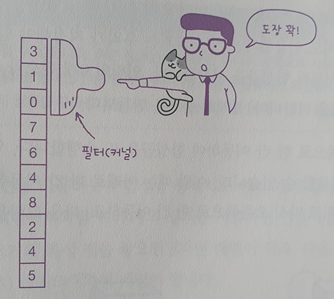  
이전에 그렸던 신경망 층의 그림은 뉴런이 길게 늘어서 있고 서로 조밀하게 연결되어 있다. 합성곱에서는 뉴런이 입력 위를 이동하면서 출력을 만들기 때문에 신경망 층의 그림으로 표현하기가 어렵다. 또한 뉴런이라고 표현하기도 어렵다.  
**합성곱 신경망**(convolutional neural network, CNN)에서는 완전 연결 신경망과 달리 뉴런을 **필터**(filter)라고 부른다. 혹은 **커널**(kernel)이라고도 부른다.

#### 완전 연결 신경망?  
7장에서 만들었던 신경망이다. 완전 연결층(밀집층)만 사용하여 만든 신경망을 완전 연결 신경망(밀집 신경망)이라고 부른다.

케라스 API와 이름을 맞추어 뉴런 개수를 이야기할 때는 필터라 부르고, 입력에 곱해지는 가중치를 의미할 때는 커널이라고 부른다. 합성곱의 장점은 1차원이 아니라 2차원 입력에도 적용할 수 있다는 것이다.  
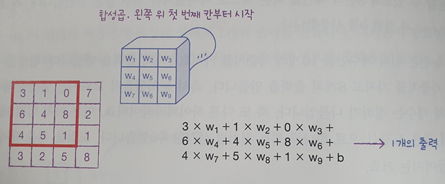  
입력이 2차원 배열이면 필터(도장!!)도 2차원이어야 한다. 이 그림에서 이 필터의 커널 크기는 (3,3)으로 가정한다.(커널 크기는 지정해야 할 하이퍼파라미터이다.)  
그다음 왼쪽 위 모서리에서부터 합성곱을 시작한다. 입력의 9개 원소와 커널의 9개 가중치를 곱한 후(물론 절편을 더한다) 1개의 출력을 만든다.
<br><br/>
그다음에는 필터가 오른쪽으로 한 칸 이동하여 합성곱을 또 수행한다. 입력의 너비가 4이므로 더이상 오른쪽으로는 한 칸 이동할 수 없다. 이럴 때는 아래로 한 칸 이동한 다음 다시 왼쪽에서부터 합성곱을 수행한다. 그리고 다시 오른쪽으로 한 칸 이동한다.  
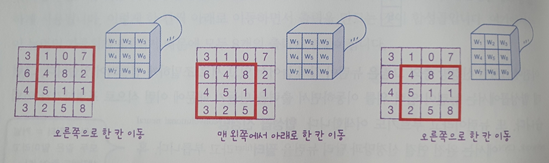
합성곱은 마치 도장을 찍듯이 왼쪽 위에서 오른쪽 맨 아래까지 이동하면서 출력을 만든다. 계산식은 밀집층과 크게 다르지 않다. 입력과 가중치의 행과 열을 맞추어 곱셈하고 모두 더하는게 전부이다.  
그림에서 필터는 모두 4번 이동할 수 있기 때문에 4개의 출력을 만든다.  
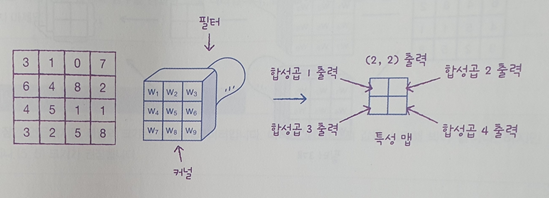  
이때 4개의 출력을 필터가 입력에 놓인 위치에 맞게 2차원으로 배치한다. 즉 왼쪽 위, 오른쪽 위, 왼쪽 아래, 오른쪽 아래 모두 4개의 위치에 해당 값을 놓는다.  
이렇게 출력을 2차원으로 표현하면 (4,4)크기의 입력을 (2,2)크기로 압축한 느낌이 난다. 합성곱 계산을 통해 얻은 출력을 **특성 맵**(feature map)이라고 부른다.

밀집층에서 여러 개의 뉴런을 사용하듯이 합성곱 층에서도 여러 개의 필터를 사용한다. 하나만 사용할 이유는 없다. 다음 그림에서처럼 여러 개의 필터를 사용하면 만들어진 특성 맵은 순서대로 차곡차곡 쌓인다. (2,2) 크기의 특성 맵을 쌓으면 3차원 배열이 된다.  
다음 그림에서는 3개의 필터를 사용했기 때문에 (2,2,3) 크기의 3차원 배열이 된다.